In [5]:
# Installing Libraries: Importing modules from packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
import warnings



In [6]:
# Data Gathering: Importing the dataset 

data = pd.read_csv('E:\Forest_Fire_Prediction_Data_Set.csv')
data

,NDVI,LST,BURNED_AREA,CLASS
0,0.506782,14584.272727,4.692308,no_fire
1,0.522150,14655.833333,5.000000,no_fire
2,0.682284,14780.000000,5.000000,fire
3,0.120046,13298.500000,3.500000,no_fire
4,0.568734,14743.000000,5.000000,no_fire
...,...,...,...,...
1708,0.621721,14406.000000,5.000000,no_fire
1709,0.709715,14330.400000,4.851852,no_fire
1710,0.613000,14751.500000,3.000000,fire
1711,0.614471,13611.000000,4.921053,no_fire


In [7]:
# Data Exploration: Drawing insights from data

data.head()

,NDVI,LST,BURNED_AREA,CLASS
0,0.506782,14584.272727,4.692308,no_fire
1,0.522150,14655.833333,5.000000,no_fire
2,0.682284,14780.000000,5.000000,fire
3,0.120046,13298.500000,3.500000,no_fire
4,0.568734,14743.000000,5.000000,no_fire


In [8]:
# Data Exploration: Determining the shape of dataset

data.shape

(1713, 4)

In [9]:
# Data Exploration: Summarizing the data 

data.describe()

,NDVI,LST,BURNED_AREA
count,1713.000000,1713.000000,1713.000000
mean,0.555665,14622.802073,4.674973
std,0.092847,366.927861,0.583791
min,0.030735,13137.000000,3.000000
25%,0.501276,14406.000000,4.521951
50%,0.565181,14645.750000,4.920635
75%,0.620987,14881.300000,5.000000
max,0.781723,15611.570513,9.000000


In [10]:
data.columns

Index(['NDVI', 'LST', 'BURNED_AREA', 'CLASS'], dtype='object')

In [11]:
# Data Cleaning: Checking for missing values

data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1713 entries, 0 to 1712
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NDVI         1713 non-null   float64
 1   LST          1713 non-null   float64
 2   BURNED_AREA  1713 non-null   float64
 3   CLASS        1713 non-null   object 
dtypes: float64(3), object(1)
memory usage: 53.7+ KB


In [12]:
# Data Pre-Processing: 
#  CLASS  FIRE -> 1
#  CLASS  NO_FIRE -> 0

data["CLASS"] = [1 if i=="fire" else 0 for i in data["CLASS"]]
data.tail(5)

,NDVI,LST,BURNED_AREA,CLASS
1708,0.621721,14406.000000,5.000000,0
1709,0.709715,14330.400000,4.851852,0
1710,0.613000,14751.500000,3.000000,1
1711,0.614471,13611.000000,4.921053,0
1712,0.549497,14269.777778,5.000000,1


In [13]:
# Data Exploration: Correlation between NDVI,LST,BURNED_AREA and CLASS
corel =data.corr()
corel["CLASS"]

NDVI          -0.127044
LST            0.287230
BURNED_AREA    0.080991
CLASS          1.000000
Name: CLASS, dtype: float64

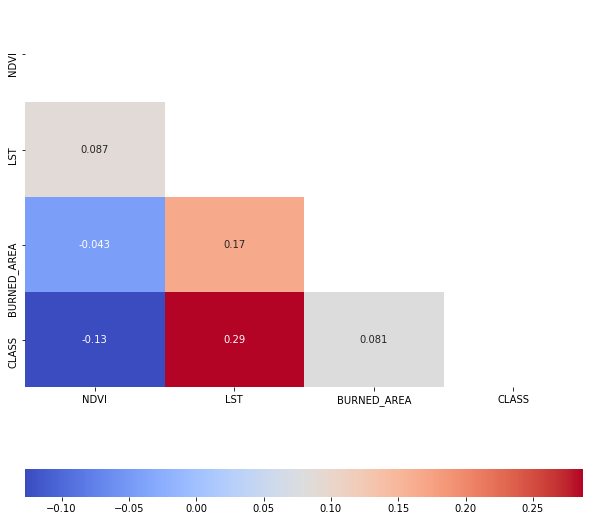

In [14]:
# Data Exploration: Visualizing Heatmap

plt.figure(figsize=(10,10))
dataplot = sns.heatmap(corel, annot = True, fmt='.2g', mask = np.triu(corel),cmap= 'coolwarm',cbar_kws= {'orientation': 'horizontal'})
plt.show()

In [15]:
# Dividing the dataset into dependent and independent variables

x = data.iloc[:,0:3]
y = data.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [16]:
x_train

,NDVI,LST,BURNED_AREA
408,0.491819,13948.584071,4.796814
1357,0.631937,14818.737973,4.542922
518,0.538733,14259.000000,5.000000
1111,0.580911,15018.568627,4.686275
538,0.516076,13967.000000,5.000000
...,...,...,...
1130,0.625392,14394.000000,3.500000
1294,0.641129,14329.500000,3.000000
860,0.636775,14821.750000,5.000000
1459,0.380665,14305.000000,4.583333


In [17]:
y

0       0
1       0
2       1
3       0
4       0
       ..
1708    0
1709    0
1710    1
1711    0
1712    1
Name: CLASS, Length: 1713, dtype: int64

In [18]:
# Standard Scaling: Scaling the data for optimised predictions 

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [19]:
x_train

array([[-0.68118448, -1.85282269,  0.21436509],
       [ 0.82835339,  0.53392558, -0.21750274],
       [-0.17576433, -1.00138172,  0.55998251],
       ...,
       [ 0.88047478,  0.54218728,  0.55998251],
       [-1.87868353, -0.87520816, -0.14876402],
       [ 0.64834177,  0.07302831, -0.01630961]])

In [20]:
# Decision Tree Algorithm
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
pred_dtc = dtc.predict(x_test)
print(classification_report(y_test, pred_dtc))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84       275
           1       0.40      0.46      0.42        68

    accuracy                           0.76       343
   macro avg       0.63      0.64      0.63       343
weighted avg       0.77      0.76      0.76       343



In [21]:
# Creating the model
rfc = RandomForestClassifier(n_estimators = 250,oob_score = True)

# Feeding the training set into the model
rfc.fit(x_train, y_train)

# Predicting the results for the test set
pred_rfc = rfc.predict(x_test)

print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.86      0.95      0.91       275
           1       0.67      0.38      0.49        68

    accuracy                           0.84       343
   macro avg       0.76      0.67      0.70       343
weighted avg       0.82      0.84      0.82       343



In [22]:
# K-Nearest Neighbor Algorithm
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       275
           1       0.55      0.40      0.46        68

    accuracy                           0.82       343
   macro avg       0.71      0.66      0.68       343
weighted avg       0.80      0.82      0.80       343



In [23]:
# Support Vector Machine Algorithm
svc = SVC()
svc.fit(x_train, y_train)
pred_svc = svc.predict(x_test)
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89       275
           1       0.50      0.06      0.11        68

    accuracy                           0.80       343
   macro avg       0.65      0.52      0.50       343
weighted avg       0.75      0.80      0.73       343



In [24]:
# Logistic Regression Algorithm
lor = LogisticRegression()
lor.fit(x_train, y_train)
pred_lor = lor.predict(x_test)
print(classification_report(y_test, pred_lor))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88       275
           1       0.31      0.07      0.12        68

    accuracy                           0.78       343
   macro avg       0.56      0.52      0.50       343
weighted avg       0.71      0.78      0.73       343



In [25]:
# Conclusion: Comparing the results!

conclusion = pd.DataFrame({'Model': ["Random Forest","K-Nearest Neighbors","Logistic Regression","Decision Tree","Support Vector Machine"],
                           'Accuracy': [accuracy_score(y_test,pred_rfc),accuracy_score(y_test,pred_knn),
                                    accuracy_score(y_test,pred_lor),accuracy_score(y_test,pred_dtc),accuracy_score(y_test,pred_svc)]})
conclusion

,Model,Accuracy
0,Random Forest,0.839650
1,K-Nearest Neighbors,0.816327
2,Logistic Regression,0.784257
3,Decision Tree,0.755102
4,Support Vector Machine,0.801749


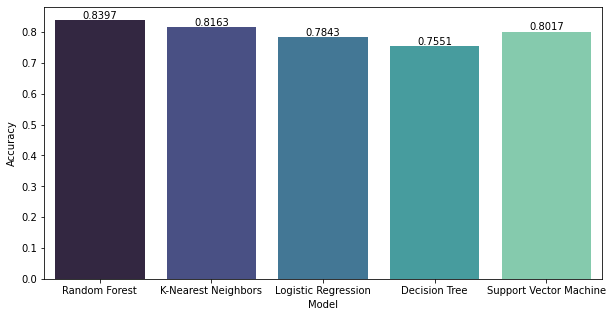

In [26]:
# Visualizing Results

plt.subplots(figsize=(10, 5))
axis = sns.barplot(x = 'Model', y = 'Accuracy', data =conclusion, palette="mako" )
axis.set(xlabel='Model', ylabel='Accuracy')

# Adding annotation to bars
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()